<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('train.csv') 

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

In [8]:
# Look inside of dataset
# train.info()
# train.describe()
# train.shape
# train.dtypes

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

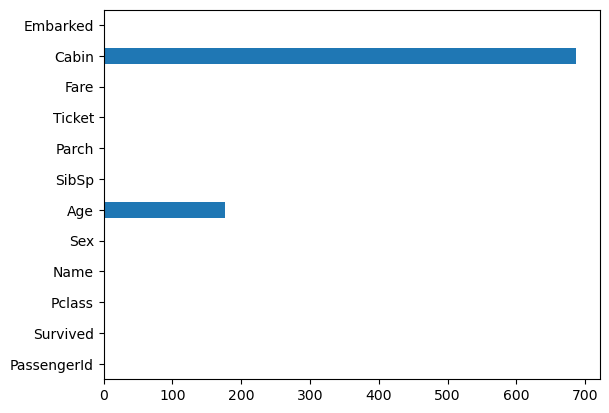

In [10]:
# Oversee the missing value in each column
train.isnull().sum().plot(kind='barh')
plt.show()

<Axes: >

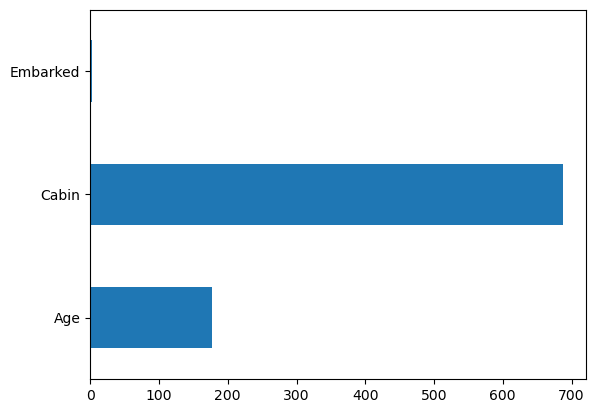

In [11]:
# Clearer Version
train.isnull().sum()[train.isnull().sum()!=0].plot(kind='barh')

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [13]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

####  3. Delete all rows where `Embarked` is empty

In [15]:
train.dropna(subset=['Embarked'],inplace = True)

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [17]:
train.fillna({'Cabin' : r'¯\_(ツ)_/¯'}, inplace = True)

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [20]:
train['FamilyCount'] = train['SibSp'] + train['Parch']
train[['Parch','SibSp','FamilyCount']]

,Parch,SibSp,FamilyCount
0,0,1,1
1,0,1,1
2,0,0,0
3,0,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,2,1,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [22]:
train['IsReverend']= train['Name'].str.contains('Rev').map(lambda x : int(x))

In [23]:
train['IsReverend'].value_counts()

IsReverend
0    883
1      6
Name: count, dtype: int64

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [37]:
# This version "remove" the original version of conlumn
train = pd.get_dummies(train, columns = ['Embarked'])

In [39]:
train['Sex'].map(lambda x: 1 if x == 'male' else 0)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int64

In [41]:
train = pd.get_dummies(train, columns=['Sex'])

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [29]:
train['Survived'].mean().round(2)

0.38

#### 2. Which gender fared the worst? What was their survival rate?

In [33]:
train.groupby('Sex')['Survived'].mean().round(2)

Sex
female    0.74
male      0.19
Name: Survived, dtype: float64

#### 3. What was the survival rate for each `Pclass`?

In [35]:
train.groupby('Pclass')['Survived'].mean().round(2)

Pclass
1    0.63
2    0.47
3    0.24
Name: Survived, dtype: float64

#### 4. Did any reverends survive? How many?`

In [47]:
reverends_survived = train[(train['IsReverend'] == '1') & (train['Survived'] == 1)].shape[0]
reverends_survived

0

#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [43]:
train[train['Cabin'] == r'¯\(ツ)/¯'][['Survived']].mean().mul(100).round(2)

Survived   NaN
dtype: float64

#### 6. What is the survival rate for people whose `Age` is empty?

In [41]:
train[train['Age'].isnull()][['Survived']].mean().mul(100).round(2)

Survived    29.38
dtype: float64

####  7. What is the survival rate for each port of embarkation?

In [37]:
train.groupby('Embarked')[['Survived']].mean().mul(100).round(2)

,Survived
Embarked,
C,55.36
Q,38.96
S,33.70


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [35]:
train[train['Age'] < 12].groupby('Pclass')[['Survived']].mean().mul(100).round(2)

,Survived
Pclass,
1,75.00
2,100.00
3,40.43


####  9. Did the captain of the ship survive? Is he on the list?

In [33]:
train[train['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [31]:
train[(train['Survived'] == 0) & (train['Fare'] == train[train['Survived'] == 0]['Fare'].max())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5


#### 11. Does having family on the boat help or hurt your chances of survival?

In [29]:
train.groupby('FamilyCount')['Survived'].mean().mul(100)

FamilyCount
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


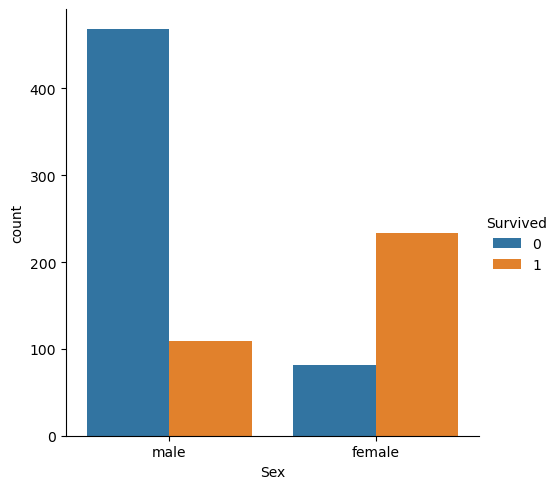

In [129]:
# Survival By Sex
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = train);

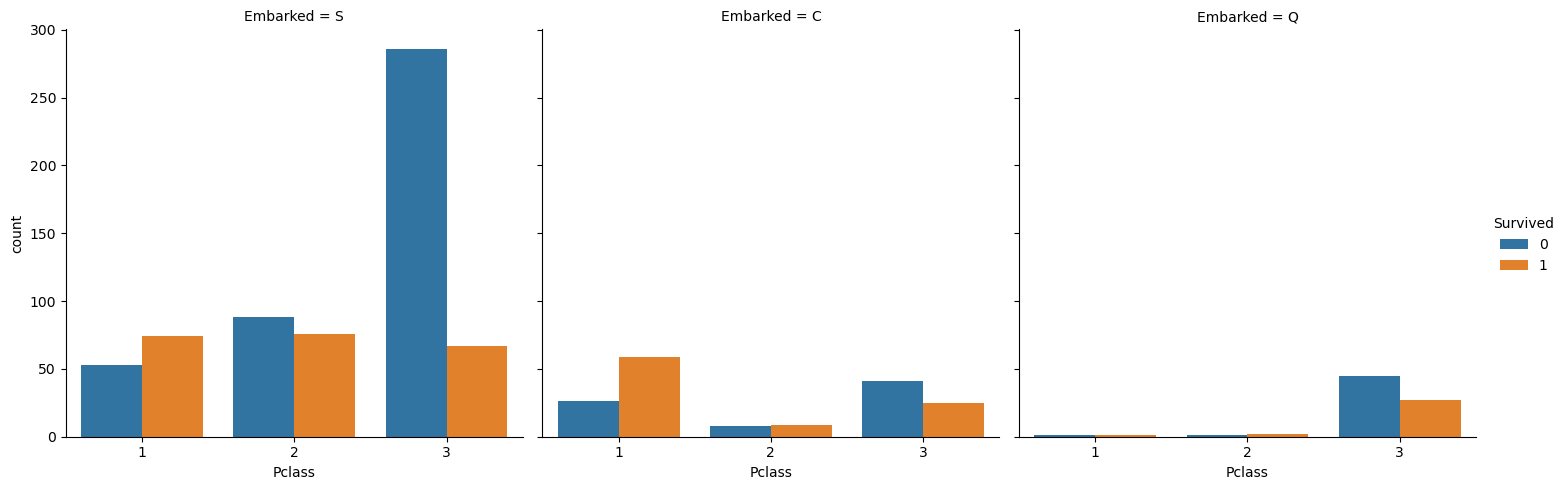

In [161]:
sns.catplot(x ='Pclass', hue ='Survived',  kind ='count', col ='Embarked', data = train); 

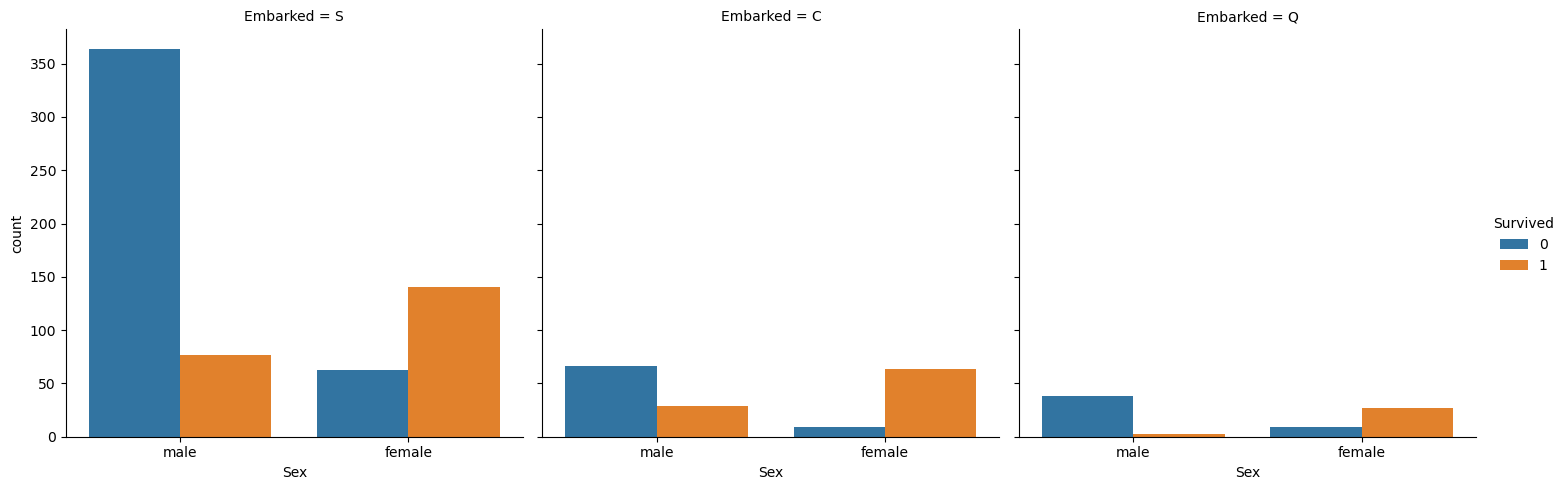

In [163]:
sns.catplot(x ='Sex', hue ='Survived',  kind ='count', col ='Embarked', data = train); 

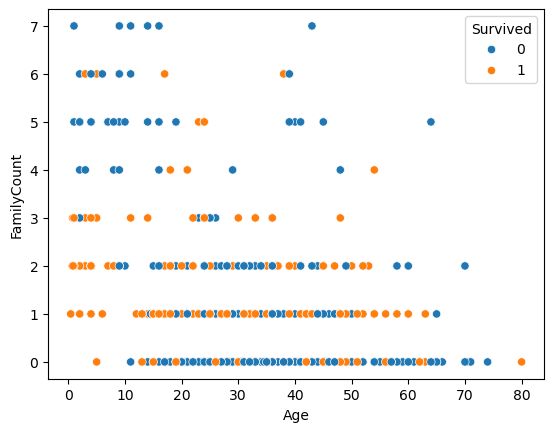

In [167]:
sns.scatterplot(x='Age', y='FamilyCount', hue='Survived', data=train);